In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [7]:
selected_data_dir = 'selected_data'
selected_pT = h5py.File(f'{selected_data_dir}/recoPFCandidates_particleFlow__RECO_obj_pt_.h5', 'r')
selected_eta = h5py.File(f'{selected_data_dir}/recoPFCandidates_particleFlow__RECO_obj_eta_.h5', 'r')
selected_phi = h5py.File(f'{selected_data_dir}/recoPFCandidates_particleFlow__RECO_obj_phi_.h5', 'r')
selected_pdgId = h5py.File(f'{selected_data_dir}/recoPFCandidates_particleFlow__RECO_obj_pdgId_.h5', 'r')

In [27]:
chunk_size = 5096
masses = np.empty(len(selected_pdgId['values']))

for start in range(0,len(selected_pdgId['values']),chunk_size):
    end = start + chunk_size

    id_chunk = selected_pdgId['values'][start:end]
    muon_idx = (np.abs(id_chunk) == 13)

    muon_pT = selected_pT['values'][start:end][muon_idx].reshape(-1,2)
    muon_eta = selected_eta['values'][start:end][muon_idx].reshape(-1,2)
    muon_phi = selected_phi['values'][start:end][muon_idx].reshape(-1,2)

    masses[start:end] = np.sqrt(2*muon_pT[:,0]*muon_pT[:,1]*(
        np.cosh(muon_eta[:,0]-muon_eta[:,1])-np.cos(muon_phi[:,0]-muon_phi[:,1])))

Text(0.5, 1.0, 'Invariant Mass')

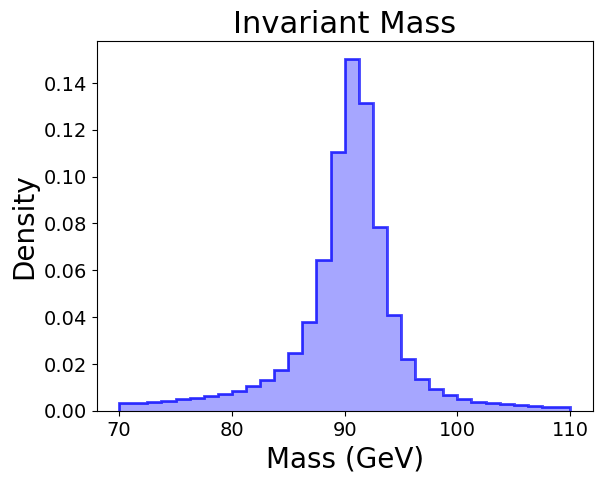

In [35]:
bins = 32
hist_range = [70,110]
label_fontsize = 20
title_fontsize = 22
legend_fontsize = 12
tick_fontsize = 14

fig, ax = plt.subplots()

hist_a,bins,_= ax.hist(masses, bins=bins, alpha=0.35, density=True, 
                       range=hist_range, color='blue');
ax.hist(masses, bins=bins, histtype='step', density=True, range=range, 
        color='blue', alpha=0.75, linewidth=2);

ax.tick_params(labelsize=tick_fontsize)
ax.set_xlabel('Mass (GeV)',fontsize=label_fontsize)
ax.set_ylabel('Density',fontsize=label_fontsize)
ax.set_title('Invariant Mass',fontsize=title_fontsize)